# This code finds the top X stations by total traffic for every day in the week, and plots total traffic lines spanning the workweek on a single figure.

In [1]:
import numpy as np
import pandas as pd
from os.path import join, isfile
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white") #lolidk

In [2]:
## SET THESE VALUES TO CUSTOMIZE CHART AT END
number_of_stations = 10                                   # will get top X stations by total traffic
highlight_stations = ['TIMES SQ-42 ST', '34 ST-HERALD SQ',
                      '23 ST', '42 ST-PORT AUTH',
                     '14 ST-UNION SQ']  # PLEASE DOUBLE CHECK THIS -- SHOULD BE STATIONS NEAR
                      #                                                                   TECH OFFICES

In [3]:
dataframes = []

for filepath in [join('BensonData', f) for f in listdir('BensonData')]:
    new_df = pd.read_csv(filepath, index_col=0)
    dataframes.append(new_df)

df1 = pd.concat(dataframes)
df1.reset_index(inplace=True)

In [4]:
df2 = (df1[df1['DWEEKDAY'] < 5].sort_values(by=['STATION', 'LINENAME'])
          .groupby(['STATION', 'LINENAME'])['TOTAL_TRAFFIC']
          .sum())

In [5]:
df2.sort_values(ascending=False, inplace=True)
df2[:number_of_stations]

STATION          LINENAME    
GRD CNTRL-42 ST  4567S           24490130.0
34 ST-HERALD SQ  BDFMNQRW        18234734.0
34 ST-PENN STA   ACE             12912245.0
14 ST-UNION SQ   LNQR456W        11599743.0
42 ST-PORT AUTH  ACENQRS1237W    11286282.0
FULTON ST        2345ACJZ        10725626.0
TIMES SQ-42 ST   1237ACENQRSW    10384668.0
47-50 STS ROCK   BDFM            10227542.0
PATH NEW WTC     1                9460392.0
59 ST COLUMBUS   ABCD1            8954471.0
Name: TOTAL_TRAFFIC, dtype: float64

In [6]:
df1.set_index(['STATION', 'LINENAME'], inplace=True)

In [7]:
topX_totaltraffic = df2[:number_of_stations]
stlntuples = topX_totaltraffic.index.tolist()
minidf1 = df1[(df1['DWEEKDAY'] < 5)&(df1.index.isin(stlntuples))]

In [8]:
#df2[:10].plot.barh()

In [9]:
df_dweekday_means = (minidf1.sort_values(by=['STATION', 'LINENAME']).reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY', 'DDATE']).sum().reset_index()
                    .groupby(['STATION', 'LINENAME', 'DWEEKDAY']).mean())

In [10]:
df_dweekday_means.reset_index(level=['DWEEKDAY'], inplace=True)
df_dweekday_means.head(7)

DWEEKDAY         index       ENTRIES         EXITS  \
STATION         LINENAME                                                       
14 ST-UNION SQ  LNQR456W         0  7.965374e+05  2.721395e+09  1.221273e+09   
                LNQR456W         1  7.882726e+05  2.690607e+09  1.207382e+09   
                LNQR456W         2  7.892546e+05  2.679858e+09  1.202175e+09   
                LNQR456W         3  7.968708e+05  2.715157e+09  1.217921e+09   
                LNQR456W         4  7.632908e+05  2.604332e+09  1.168373e+09   
34 ST-HERALD SQ BDFMNQRW         0  2.260695e+07  3.408304e+10  4.426118e+10   
                BDFMNQRW         1  2.240549e+07  3.376292e+10  4.378726e+10   

                             WEEKDAY    ENTRY_DIFFS     EXIT_DIFFS  \
STATION         LINENAME                                             
14 ST-UNION SQ  LNQR456W    3.000000   66499.000000   58796.176471   
                LNQR456W  158.000000   74034.117647   63856.941176   
                LNQR456W  313.058824   75590.294118   64810.529412   
                LNQR456W  471.882353   76052.117647   65132.705882   
                LNQR456W  602.444444   69441.388889   60482.000000   
34 ST-HERALD SQ BDFMNQRW   47.647059  107597.764706  102669.823529   
                BDFMNQRW  371.941176  115487.058824  111871.705882   

                          TOTAL_TRAFFIC  
STATION         LINENAME                 
14 ST-UNION SQ  LNQR456W  125295.176471  
                LNQR456W  137891.058824  
                LNQR456W  140400.823529  
                LNQR456W  141184.823529  
                LNQR456W  129923.388889  
34 ST-HERALD SQ BDFMNQRW  204536.588235  
                BDFMNQRW  221405.647059

In [11]:
# df_dweekday_means.loc[stlntuples[0][0], stlntuples[0][1]]

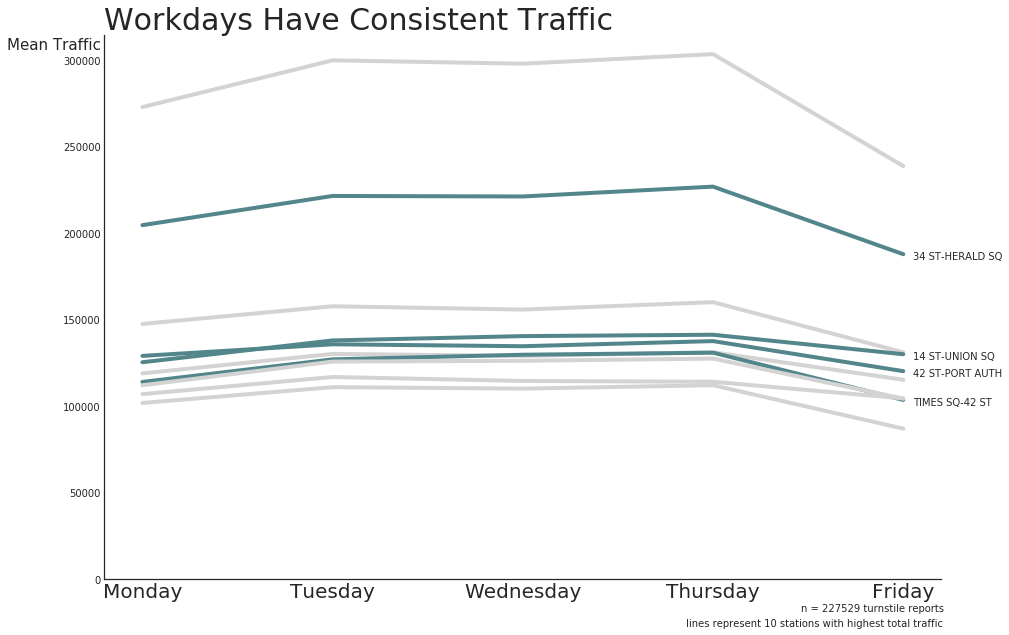

In [67]:
plt.figure(figsize=[15,10])
for stn, lnm in stlntuples:
    littleframe = df_dweekday_means.loc[stn, lnm]
    plt.plot(littleframe['DWEEKDAY'], littleframe['TOTAL_TRAFFIC'], label=stn,
            color='#53868B' if stn in highlight_stations else 'lightgray',
            lw=4)
    if stn in highlight_stations:
        plt.text(littleframe['DWEEKDAY'].values[-1]+0.05, littleframe['TOTAL_TRAFFIC'].values[-1]-3000, stn)


ticks_x =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = plt.gca()
plt.title("Workdays Have Consistent Traffic", size=30, loc='left')
plt.xticks(np.arange(0,5), ticks_x, size = 20)
plt.yticks(np.arange(0,320000, 50000))
#plt.legend(bbox_to_anchor=(1.01,1))
plt.ylabel("Mean Traffic", rotation=0, labelpad = 75, size = 15)
ax.yaxis.set_label_coords(-0.06, 0.97)
sns.despine()
plt.gcf().text(0.77,0.08, "n = 227529 turnstile reports")
plt.gcf().text(0.664,0.06, "lines represent 10 stations with highest total traffic")
plt.savefig('Workdays-Consistent-Traffic.png')

In [13]:
littleframe['DWEEKDAY'].values[-1]

4

In [18]:
minidf1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 227529 entries, (34 ST-HERALD SQ, BDFMNQRW) to (GRD CNTRL-42 ST, 4567S)
Data columns (total 17 columns):
index            227529 non-null int64
C/A              227529 non-null object
UNIT             227529 non-null object
SCP              227529 non-null object
DIVISION         227529 non-null object
DATE             227529 non-null object
TIME             227529 non-null object
DESC             227529 non-null object
ENTRIES          227529 non-null int64
EXITS            227529 non-null int64
DATETIME         227529 non-null object
WEEKDAY          227529 non-null int64
ENTRY_DIFFS      219470 non-null float64
EXIT_DIFFS       222392 non-null float64
TOTAL_TRAFFIC    218939 non-null float64
DDATE            227529 non-null object
DWEEKDAY         227529 non-null int64
dtypes: float64(3), int64(5), object(9)
memory usage: 30.2+ MB


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3350988 entries, (59 ST, NQR456W) to (RIT-ROOSEVELT, R)
Data columns (total 17 columns):
index            int64
C/A              object
UNIT             object
SCP              object
DIVISION         object
DATE             object
TIME             object
DESC             object
ENTRIES          int64
EXITS            int64
DATETIME         object
WEEKDAY          int64
ENTRY_DIFFS      float64
EXIT_DIFFS       float64
TOTAL_TRAFFIC    float64
DDATE            object
DWEEKDAY         int64
dtypes: float64(3), int64(5), object(9)
memory usage: 444.2+ MB
